# What Affects Students’ Performance in Math?
## A. Motivation

Carol Dweck, an American psychologist, once shared about the power of "yet" in one of her speeches. In a high school in Chicago, students who didn't pass a course got the grade "Not Yet.“ The reason, she said, was that "If you get a failing grade, you think, I'm nothing, I'm nowhere. But if you get the grade "Not Yet", you understand that you're on a learning curve. It gives you a path into the future."  
In a psychological perspective, the power of believing one may affect a student's performance. In this project, we investigate the attributes that affect students' performance in math from a statistical aspect.

___
## B. Datasets

Considering the sample size and completeness of different online sources, we chose four datasets for further investigation.

- [This dataset](https://data.mendeley.com/datasets/smgx6s5pwr/1) contains information of **Iraqi** students. The information is collected through a survey.  
Attributes include family size, mother's job, attendance, etc.

- [This dataset](https://data.mendeley.com/datasets/83tcx8psxv/1) contains information of **Columbian** students.  
Attributes include father's education, internet access, whether the family owns a car, etc.

- [This dataset](https://www.kaggle.com/uciml/student-alcohol-consumption) contains information of **Portuguese** students. The information is collected through a survey.  
Attributes include family size, mother's education, whether the student is in a romantic relationship, etc.

- [This dataset](https://www.kaggle.com/aljarah/xAPI-Edu-Data) contains information information of 480 students. The information is collected from a learning management system called Kalboard 360 through experience API (xAPI), a learner activity tracker that monitors learning progress and user actions.  
Attributes include absent days, how often the student visits the course content, how often the student checks for new announcements, etc.

Some of the common attributes of the datasets are listed below.

- Medu/ Fedu - mother's/ father's education (numeric: 0 - none, 1 - primary education, ..., 4 - higher education)
- Internet - Internet access at home (binary: yes or no)
- Family Size - number of family members (numeric)

The following analysis, the links above, and the corresponding datasets in the zip file may provide more detailed information.

___
## C. Data Analysis

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
plt.rcParams["figure.dpi"] = 1000

### 1. Learning-related Activities
### (a) Summary

In [2]:
def percentile(data1, p):
    if type(data1) == np.ndarray:        
        alldata = data1.copy()
        data1 = data1.copy()
    else:
        alldata = data1.values.copy()
        data1 = data1.values.copy()
    alldata.sort()
    n = alldata.size
    l = (n + 1) * p / 100 - 1
    f_l = math.floor(l)
    c_l = math.ceil(l)
    percentile_v = alldata[f_l] + (alldata[c_l] - alldata[f_l]) * (l - f_l)
    return percentile_v

In [9]:
data = pd.read_csv('xAPI-Edu-Data.csv')
x = data['Class']
#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "H":
        h[index] = 60
        index = index + 1
    if x[i] == "M":
        h[index] = 75
        index = index + 1
    if x[i] == "L":
        h[index] = 90
        index = index + 1
fg = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    fg[i] = h[i]
#print(fg)

  Newspaper  Frequency  Relative Frequency
M         M        211            0.439583
H         H        142            0.295833
L         L        127            0.264583


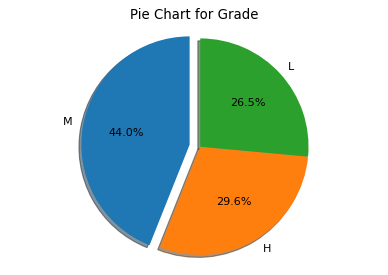

In [23]:
#frequency
Ncount_tab = data['Class'].value_counts()
#print(Ncount_tab)
#Relative frequency
Npropotion_tab = Ncount_tab/len(data['Class'])
#print(Npropotion_tab)
NName = ("M", "H", "L")
fre_tab={"Newspaper": NName, "Frequency":Ncount_tab, "Relative Frequency": Npropotion_tab}
print(pd.DataFrame(fre_tab))

explode=(0.1, 0, 0)

fig, ax = plt.subplots()
ax.pie(Ncount_tab,explode=explode, labels=NName, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Grade')
plt.show()

### (b) Hands Raised

raisehands std = 30.779222582734224
mean of raisedhands = 46.775
median of raisedhands = 50.0
max of raisedhands = 100
min of raisedhands = 0
p25 = 15.25
p75 = 75.0


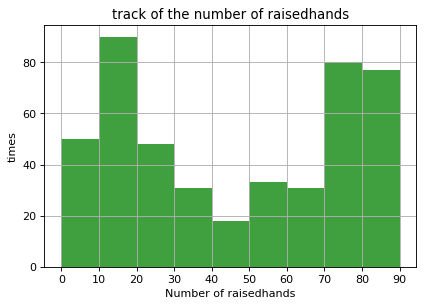

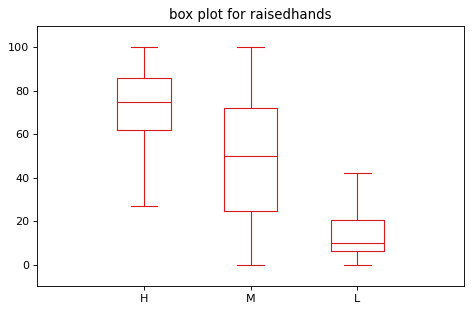

In [25]:
data = pd.read_csv('xAPI-Edu-Data.csv')
print("raisehands std =", data['raisedhands'].std())
print("mean of raisedhands =", np.mean(data['raisedhands']))
print("median of raisedhands =", np.median(data['raisedhands']))
print("max of raisedhands =", np.max(data['raisedhands']))
print("min of raisedhands =", np.min(data['raisedhands']))
print("p25 =", percentile(data['raisedhands'], 25))
print("p75 =", percentile(data['raisedhands'], 75))
# the histogram of the data
bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(data["raisedhands"], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(data["raisedhands"])
sigma = np.std(data["raisedhands"])
plt.ylabel('times')
plt.xlabel('Number of raisedhands')
plt.title('track of the number of raisedhands')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
# ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

data = pd.read_csv('xAPI-Edu-Data.csv')
x = data['Class']
y = data['raisedhands']
#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "H":
        h[index] = y[i]
        index = index + 1
h1 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h1[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "M":
        h[index] = y[i]
        index = index + 1
h2 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h2[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "L":
        h[index] = y[i]
        index = index + 1
h3 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h3[i] = h[i]
    
data_a = [h1, h2, h3]

ticks = ['H', 'M', 'L']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, sym='', widths=1)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.title("box plot for raisedhands")
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(-10, 110)
plt.tight_layout()
plt.savefig('boxcompare.png')

由以上分析可以得到：舉手次數和分數大致呈正相關。

### (c) Course Content Visits

VisITedResources std = 33.08000669966417
mean of VisITedResources = 54.797916666666666
median of VisITedResources = 65.0
max of VisITedResources = 99
min of VisITedResources = 0
p25 = 20.0
p75 = 84.0


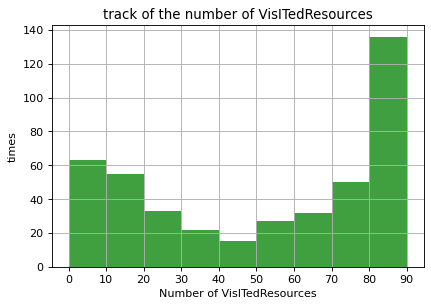

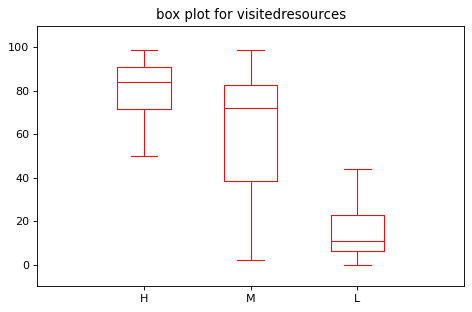

In [27]:
print("VisITedResources std =", data['VisITedResources'].std())
print("mean of VisITedResources =", np.mean(data['VisITedResources']))
print("median of VisITedResources =", np.median(data['VisITedResources']))
print("max of VisITedResources =", np.max(data['VisITedResources']))
print("min of VisITedResources =", np.min(data['VisITedResources']))
print("p25 =", percentile(data['VisITedResources'], 25))
print("p75 =", percentile(data['VisITedResources'], 75))
bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(data["VisITedResources"], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(data["VisITedResources"])
sigma = np.std(data["VisITedResources"])
plt.ylabel('times')
plt.xlabel('Number of VisITedResources')
plt.title('track of the number of VisITedResources')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
# ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

x = data['Class']
y = data['VisITedResources']
#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "H":
        h[index] = y[i]
        index = index + 1
h1 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h1[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "M":
        h[index] = y[i]
        index = index + 1
h2 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h2[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "L":
        h[index] = y[i]
        index = index + 1
h3 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h3[i] = h[i]
    
data_a = [h1, h2, h3]

ticks = ['H', 'M', 'L']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, sym='', widths=1)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.title("box plot for visitedresources")
plt.xlim(-2, len(ticks)*2)
plt.ylim(-10, 110)
plt.tight_layout()
plt.savefig('boxcompare.png')

由以上分析可以得到：學生訪問課程內容的次數和分數大致呈正相關。

### (d) Course Announcement Views

AnnouncementsView std = 26.611244081903486
mean of AnnouncementsView = 37.91875
median of AnnouncementsView = 33.0
max of AnnouncementsView = 98
min of AnnouncementsView = 0
p25 = 14.0
p75 = 58.0


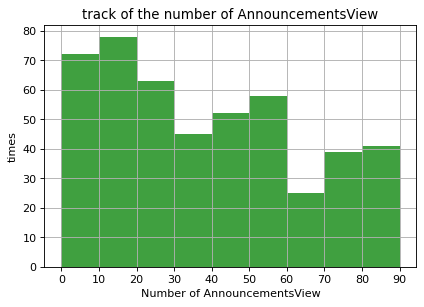

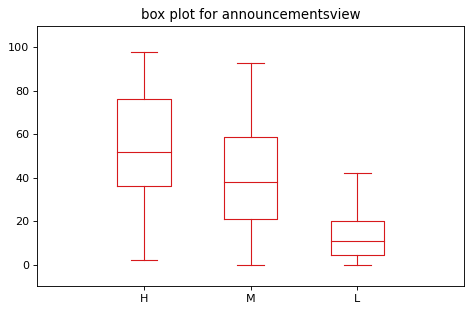

In [28]:
print("AnnouncementsView std =", data['AnnouncementsView'].std())
print("mean of AnnouncementsView =", np.mean(data['AnnouncementsView']))
print("median of AnnouncementsView =", np.median(data['AnnouncementsView']))
print("max of AnnouncementsView =", np.max(data['AnnouncementsView']))
print("min of AnnouncementsView =", np.min(data['AnnouncementsView']))
print("p25 =", percentile(data['AnnouncementsView'], 25))
print("p75 =", percentile(data['AnnouncementsView'], 75))
bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(data["AnnouncementsView"], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(data["AnnouncementsView"])
sigma = np.std(data["AnnouncementsView"])
plt.ylabel('times')
plt.xlabel('Number of AnnouncementsView')
plt.title('track of the number of AnnouncementsView')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
# ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

x = data['Class']
y = data['AnnouncementsView']
#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "H":
        h[index] = y[i]
        index = index + 1
h1 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h1[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "M":
        h[index] = y[i]
        index = index + 1
h2 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h2[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "L":
        h[index] = y[i]
        index = index + 1
h3 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h3[i] = h[i]
    
data_a = [h1, h2, h3]

ticks = ['H', 'M', 'L']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, sym='', widths=1)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.title("box plot for announcementsview")
plt.xlim(-2, len(ticks)*2)
plt.ylim(-10, 110)
plt.tight_layout()
plt.savefig('boxcompare.png')

由以上分析可以得到：學生檢查新公告的次數和分數大致呈正相關。

### (e) Participation in Discussions

Discussion std = 27.637735038376356
mean of Discussion = 43.28333333333333
median of Discussion = 39.0
max of Discussion = 99
min of Discussion = 1
p25 = 20.0
p75 = 70.0


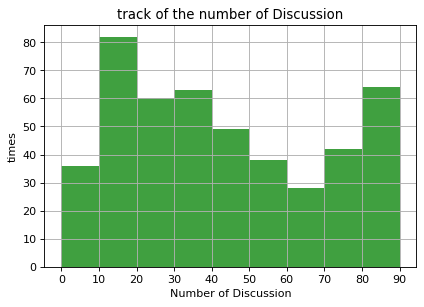

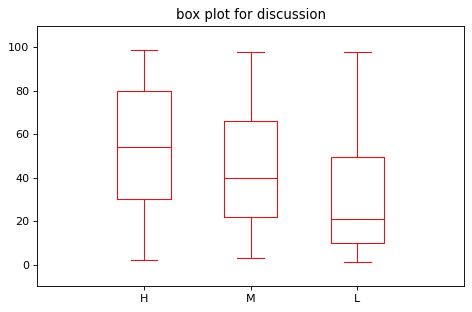

In [29]:
print("Discussion std =", data['Discussion'].std())
print("mean of Discussion =", np.mean(data['Discussion']))
print("median of Discussion =", np.median(data['Discussion']))
print("max of Discussion =", np.max(data['Discussion']))
print("min of Discussion =", np.min(data['Discussion']))
print("p25 =", percentile(data['Discussion'], 25))
print("p75 =", percentile(data['Discussion'], 75))
bins_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(data["Discussion"], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(data["Discussion"])
sigma = np.std(data["Discussion"])
plt.ylabel('times')
plt.xlabel('Number of Discussion')
plt.title('track of the number of Discussion')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
# ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

x = data['Class']
y = data['Discussion']
#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "H":
        h[index] = y[i]
        index = index + 1
h1 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h1[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "M":
        h[index] = y[i]
        index = index + 1
h2 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h2[i] = h[i]

#print(y.median())
h = np.zeros(x.shape[0])
index = 0
for i in range (x.shape[0]):
    if x[i] == "L":
        h[index] = y[i]
        index = index + 1
h3 = np.zeros(index)
#print(h1.shape[0])
for i in range (index):
    h3[i] = h[i]
    
data_a = [h1, h2, h3]

ticks = ['H', 'M', 'L']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0, sym='', widths=1)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.title("box plot for discussion")
plt.xlim(-2, len(ticks)*2)
plt.ylim(-10, 110)
plt.tight_layout()
plt.savefig('boxcompare.png')

由以上分析可以得到：學生參加討論小組的次數和分數大致呈正相關。

**小結**  
在上述四項活動中，舉手和訪問課程內容的次數在拿到高分的群體和拿到低分的群組相差較大，而查看新公告和參加討論小組的次數在拿到高分的群體和拿到低分的群組相差較小。

___
### 2. Family
### (a) Quantify Ordinal Data & Summary

In [1]:
def corr0_test(n, r):
    alpha = 0.01
    df1 = n - 2
    t = r*(df1/(1-r**2))**(1/2)
    tcv = stats.t.ppf(1 - alpha/2, df = df1)
    print(f"tcv = {tcv:.4f}")
    print(f"t = {t:.4f}")
    
    if(t > tcv):
        print("由於t的絕對值 > tcv，且t > 0，我們得以拒絕null hypothesis，此因素和學生數學成績呈正相關。")
    elif(-t > tcv):
        print("由於t的絕對值 > tcv，且t < 0，我們無法拒絕null hypothesis，此因素和學生數學成績呈負相關。")
    else:
        print("由於t的絕對值 <= tcv，我們無法拒絕null hypothesis，此因素和學生數學成績無關。")

In [2]:
data1 = pd.read_excel("student-mat.xlsx")
data2 = pd.read_excel("Iraqi Student Performance Prediction.xlsx")
data3 = pd.read_excel("data_academic_performance.xlsx")
Por = pd.read_excel("student-por.xlsx")

data1["parentEdu"] = data1["Medu"] + data1["Fedu"]

mapping = {
    'Illiterate': 0 ,
    'ba':3,
    'higher':4,
    'secondary': 2,
    'medium': 1
}

data2["Mother education"] = data2["Mother education"].map(mapping)
data2["Father education"] = data2["Father education"].map(mapping)
data2["parentEdu"] = data2["Mother education"] + data2["Father education"]

data3 = data3[data3["EDU_FATHER"] != 'Not sure']
data3 = data3[data3["EDU_MOTHER"] != 'Not sure']

mapping = {
    'Incomplete Professional Education': 2,
    'Complete Secundary': 2,
    'Complete professional education': 3,
    'Incomplete Secundary': 1,
    'Incomplete technical or technological': 2,
    'Complete technique or technology': 3,
    'Incomplete primary ': 0,
    'Complete primary ': 1,
    'Postgraduate education': 4,
    'Ninguno': 0
}

data3["EDU_FATHER"] = data3["EDU_FATHER"].map(mapping)
data3["EDU_MOTHER"] = data3["EDU_MOTHER"].map(mapping)
data3["parentEdu"] = data3["EDU_MOTHER"] + data3["EDU_FATHER"]

data1["avG"] = (data1["G1"] + data1["G2"] + data1["G3"])/3

dataIra = pd.DataFrame(data2, columns = ['Mother education', 'Father education', 'math', 'parentEdu'])
dataPor = pd.DataFrame(data1, columns = ['Medu', 'Fedu', 'avG', 'parentEdu'])
dataCol = pd.DataFrame(data3, columns = ['EDU_MOTHER', 'EDU_FATHER', 'MAT_S11', 'parentEdu'])
dataPor = dataPor.rename(columns = {'Medu':'Mother education','Fedu':'Father education','parentEdu':'Parent education','avG':'math'})
dataIra = dataIra.rename(columns = {'parentEdu':'Parent education'})
dataCol = dataCol.rename(columns = {'EDU_MOTHER':'Mother education','EDU_FATHER':'Father education','parentEdu':'Parent education','MAT_S11':'math'})

In [3]:
dataIra['family size'] = data2['Family Size']
dataCol['family size'] = data3['PEOPLE_HOUSE']
dataPor['family size'] = data1['famsize']

dataI0 = dataIra[dataIra['family size']==0]
dataI1 = dataIra[dataIra['family size']==1]
dataI2 = dataIra[dataIra['family size']==2]

mapping = {
    'Three':3,
    'One': 1, 
    'Four': 4,
    'Five': 5,
    'Six': 6,
    'Two': 2,
    'Twelve or more': 12,
    'Nueve': 9,
    'Eight': 8,
    'Seven': 7,
    'Once': 1,
    'Ten':10
}

dataCol['family size']=dataCol['family size'].map(mapping)

dataLE3 = dataPor[dataPor['family size']=="LE3"]
dataGT3 = dataPor[dataPor['family size']=="GT3"]


以上為讀取資料，並將ordinal data量化(e.g.照最終學歷高低為兩親教育程度評分)。

#### Iraq

In [4]:
print("mean:",dataIra['math'].mean())
print("median:",dataIra['math'].median())
print("std. dev:",dataIra['math'].std())
print("max:",dataIra['math'].max())
print("min:",dataIra['math'].min())

mean: 65.475
median: 62.5
std. dev: 23.32199254211469
max: 100
min: 6


#### Columbia

In [5]:
print("mean:",dataCol['math'].mean())
print("median:",dataCol['math'].median())
print("std. dev:",dataCol['math'].std())
print("max:",dataCol['math'].max())
print("min:",dataCol['math'].min())

mean: 64.38332077367495
median: 64.0
std. dev: 11.8838555289222
max: 100
min: 26


#### Portugal

In [6]:
print("mean:",dataPor['math'].mean())
print("median:",dataPor['math'].median())
print("std. dev:",dataPor['math'].std())
print("max:",dataPor['math'].max())
print("min:",dataPor['math'].min())

mean: 10.679324894514782
median: 10.666666666666666
std. dev: 3.6967856336770737
max: 19.333333333333332
min: 1.3333333333333333


有鑑於各國資料蒐集方式及給分方式的不同(如葡萄牙分數區間為1 ~ 20)，且同類型因素資料種類不盡相同，我們決定不將三國資料合併分析。

### (b) Education Level of Parents

#### Null Hypothesis: 父母教育程度和學生數學成績無關。

#### Iraq

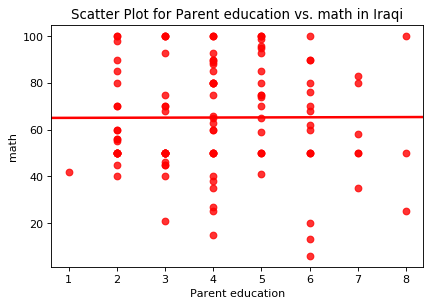

mean: 4.084033613445378
median: 4.0
std. dev: 1.5922472762391742
max: 8.0
min: 1.0
correlation coef of math grades and parent education: 0.003246197348993037


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 80
import statistics as s

#dataCol = dataCol.replace([np.inf, -np.inf], np.nan).dropna()

_ = sns.regplot(x='Parent education', y= 'math', data = dataIra, color = 'r', ci = None)
plt.title('Scatter Plot for Parent education vs. math in Iraqi')
plt.show()

print("mean:",dataIra['Parent education'].mean())
print("median:",dataIra['Parent education'].median())
print("std. dev:",dataIra['Parent education'].std())
print("max:",dataIra['Parent education'].max())
print("min:",dataIra['Parent education'].min())
print("correlation coef of math grades and parent education:",dataIra.corr()["math"]["Parent education"])

In [102]:
n = len(dataIra['math'])
r = dataIra.corr()["math"]["Parent education"]
corr0_test(n, r)

tcv = 2.6181
t = 0.0353
由於t的絕對值 <= tcv，我們無法拒絕null hypothesis，此因素和學生數學成績無關。


#### Columbia

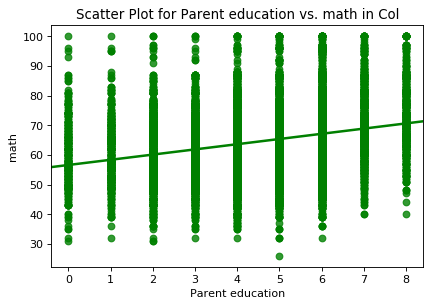

mean: 4.560351579496998
median: 5.0
std. dev: 1.8264781126190532
max: 8.0
min: 0.0
correlation coef of math grades and parent education: 0.2685693322135108


In [8]:
_ = sns.regplot(x='Parent education', y= 'math', data = dataCol, color = 'g', ci = None)
plt.title('Scatter Plot for Parent education vs. math in Col')
plt.show()
#Compute the covariance matrix
print("mean:",dataCol['Parent education'].mean())
print("median:",dataCol['Parent education'].median())
print("std. dev:",dataCol['Parent education'].std())
print("max:",dataCol['Parent education'].max())
print("min:",dataCol['Parent education'].min())
print("correlation coef of math grades and parent education:",dataCol.corr()["math"]["Parent education"])

In [103]:
n = len(dataCol['math'])
r = dataCol.corr()["math"]["Parent education"]
corr0_test(n, r)

tcv = 2.5762
t = 30.4672
由於t的絕對值 > tcv，且t > 0，我們得以拒絕null hypothesis，此因素和學生數學成績呈正相關。


#### Portugal

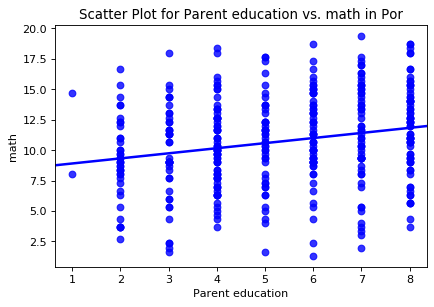

mean: 5.270886075949367
median: 5.0
std. dev: 1.9667381263266182
max: 8
min: 1
correlation coef of math grades and parent education: 0.22212797032378048


In [9]:
_ = sns.regplot(x='Parent education', y= 'math', data = dataPor, color = 'b', ci = None)
plt.title('Scatter Plot for Parent education vs. math in Por')
plt.show()

print("mean:",dataPor['Parent education'].mean())
print("median:",dataPor['Parent education'].median())
print("std. dev:",dataPor['Parent education'].std())
print("max:",dataPor['Parent education'].max())
print("min:",dataPor['Parent education'].min())
print("correlation coef of math grades and parent education:",dataPor.corr()["math"]["Parent education"])

In [105]:
n = len(dataPor['math'])
r = dataPor.corr()["math"]["Parent education"]
corr0_test(n, r)

tcv = 2.5884
t = 4.5163
由於t的絕對值 > tcv，且t > 0，我們得以拒絕null hypothesis，此因素和學生數學成績呈正相關。


**小結**  
我們發現父母教育程度和學生的數學成績皆呈正相關，在哥倫比亞和葡萄牙尤其明顯，支持原本的假設。  
由於哥倫比亞有超過一萬筆的數據，資料量夠大，我們認為其結果可信度很高。  
但在伊拉克，相關係數只有0.003左右，可能是因為資料不足，造成抽樣誤差，或是伊拉克父母教育程度真的與兒女在數學科表現無關，我們就不得而知了。

### (c) Family Size

#### Null Hypothesis: 家庭人數和學生數學成績呈負相關。

#### Iraq

0    70
1    40
2    10
Name: family size, dtype: int64

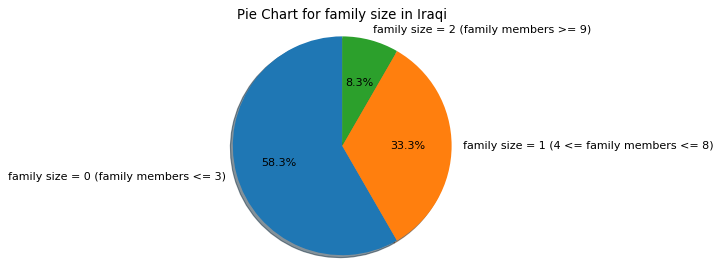

In [24]:
Bcount_tab = dataIra['family size'].value_counts()
display(Bcount_tab)

BName = ("family size = 0 (family members <= 3)", "family size = 1 (4 <= family members <= 8)", "family size = 2 (family members >= 9)")
explode = (0, 0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for family size in Iraqi')
plt.show()

##### family size = 0 (family members <= 3)

In [11]:
print("mean:",dataI0['math'].mean())
print("median:",dataI0['math'].median())
print("std. dev:",dataI0['math'].std())
print("max:",dataI0['math'].max())
print("min:",dataI0['math'].min())

mean: 63.02857142857143
median: 60.0
std. dev: 21.862529275804388
max: 100
min: 13


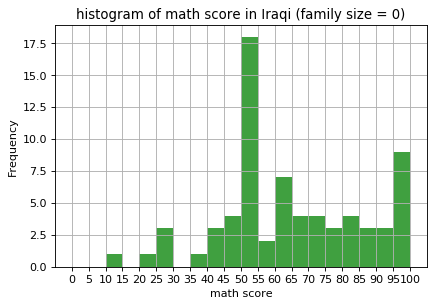

In [12]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(dataI0['math'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(dataI0['math'])
sigma = np.std(dataI0['math'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (family size = 0)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

##### family size = 1 (4 <= family members <= 8)

In [13]:
print("mean:",dataI1['math'].mean())
print("median:",dataI1['math'].median())
print("std. dev:",dataI1['math'].std())
print("max:",dataI1['math'].max())
print("min:",dataI1['math'].min())

mean: 69.15
median: 75.0
std. dev: 25.77869324929069
max: 100
min: 6


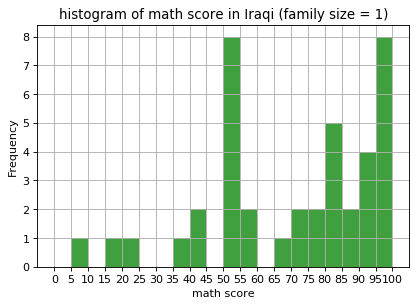

In [14]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(dataI1['math'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(dataI1['math'])
sigma = np.std(dataI1['math'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (family size = 1)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

##### family size = 2 (family members >= 9)

In [15]:
print("mean:",dataI2['math'].mean())
print("median:",dataI2['math'].median())
print("std. dev:",dataI2['math'].std())
print("max:",dataI2['math'].max())
print("min:",dataI2['math'].min())

mean: 67.9
median: 62.5
std. dev: 23.1202172231241
max: 100
min: 35


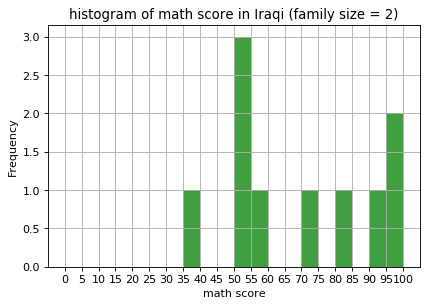

In [16]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(dataI2['math'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(dataI2['math'])
sigma = np.std(dataI2['math'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (family size = 2)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

觀察三張圖表，50 ~ 55和95 ~ 100兩區間都有較大人數，分布相似。

#### Columbia

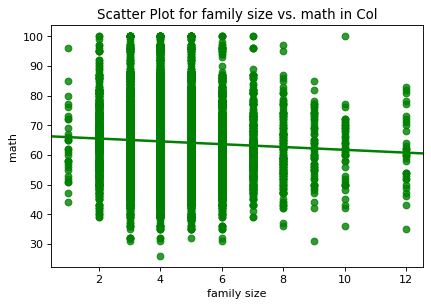

mean: 4.340966280825365
median: 4.0
std. dev: 1.3433020396787192
max: 12.0
min: 1.0
correlation coef of math grades and family size: -0.05364985371499446


In [17]:
_ = sns.regplot(x='family size', y= 'math', data = dataCol, color = 'g', ci = None)
plt.title('Scatter Plot for family size vs. math in Col')
plt.show()
#Compute the covariance matrix
dataCol.corr()["math"]["family size"]

print("mean:",dataCol['family size'].mean())
print("median:",dataCol['family size'].median())
print("std. dev:",dataCol['family size'].std())
print("max:",dataCol['family size'].max())
print("min:",dataCol['family size'].min())
print("correlation coef of math grades and family size:",dataCol.corr()["math"]["family size"])

In [106]:
n = len(dataCol['math'])
r = dataCol.corr()["math"]["family size"]
corr0_test(n, r)

tcv = 2.5762
t = -5.8710
由於t的絕對值 > tcv，且t < 0，我們無法拒絕null hypothesis，此因素和學生數學成績呈負相關。


#### Portugal

GT3    281
LE3    114
Name: family size, dtype: int64

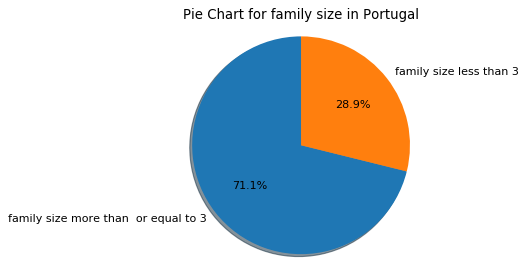

In [18]:
Bcount_tab = dataPor['family size'].value_counts()
display(Bcount_tab)

BName = ("family size more than  or equal to 3", "family size less than 3")
explode = (0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for family size in Portugal')
plt.show()


##### family size = LE3

In [19]:
print("mean:",dataLE3['math'].mean())
print("median:",dataLE3['math'].median())
print("std. dev:",dataLE3['math'].std())
print("max:",dataLE3['math'].max())
print("min:",dataLE3['math'].min())

mean: 11.157894736842108
median: 11.0
std. dev: 3.516839816318011
max: 18.666666666666668
min: 2.0


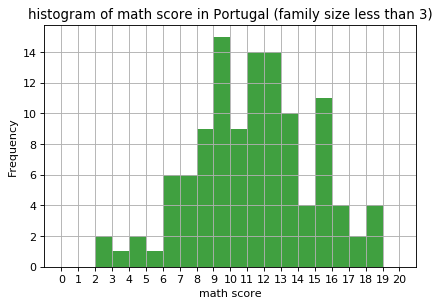

In [20]:
arr = np.arange(0, 21)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(dataLE3['math'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(dataLE3['math'])
sigma = np.std(dataLE3['math'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Portugal (family size less than 3)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

##### family size = GT3

In [21]:
print("mean:",dataGT3['math'].mean())
print("median:",dataGT3['math'].median())
print("std. dev:",dataGT3['math'].std())
print("max:",dataGT3['math'].max())
print("min:",dataGT3['math'].min())

mean: 10.485172004744955
median: 10.333333333333334
std. dev: 3.756037148324604
max: 19.333333333333332
min: 1.3333333333333333


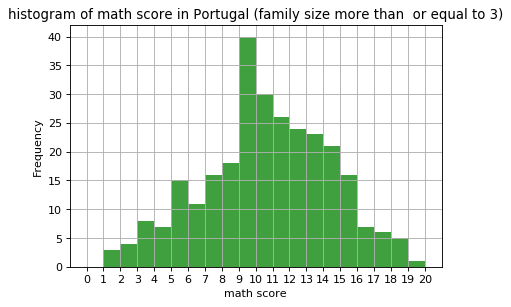

In [22]:
arr = np.arange(0, 21)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(dataGT3['math'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(dataGT3['math'])
sigma = np.std(dataGT3['math'])
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Portugal (family size more than  or equal to 3)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

**小結**  
觀察以上資料，在伊拉克的資料中，family size = 2 的學生們數學成績中位數比其他組別高出10分。但後來發現這組學生只有40人，我們判斷該結果是抽樣誤差造成的。而分析數據量較多，且家庭人數為interval data的哥倫比亞，學生數學成績和家庭人數相關係數雖趨近0，但照函式結果判斷兩者有負相關。

### (d) Whether One's Father is Employed

#### Null Hypothesis: 父親有工作對數學成績有正面影響。

In [2]:
iraqi = pd.read_excel('Iraqi.xlsx')
columbia = pd.read_excel('data_academic_performance.xlsx')
portugal = pd.read_csv('student-mat.csv')

In [149]:
#針對伊拉克資料的處理

fjobIraqi = iraqi['Father Job']
mjobIraqi = iraqi['Mother Job']
revenueIraqi = iraqi['Family Economic Level']

mathIraqi = iraqi['math']

fnojob = []
fno = 0
fhavejob = []
fha = 0
for i in range(0, fjobIraqi.shape[0]):
    if fjobIraqi[i] == "no":
        fnojob.append(mathIraqi[i])
        fno = fno + 1
    else:
        fhavejob.append(mathIraqi[i])
        fha = fha + 1

        
mnojob = []
mno = 0
mhavejob = []
mha = 0
for i in range(0, mjobIraqi.shape[0]):
    if mjobIraqi[i] == "no":
        mnojob.append(mathIraqi[i])
        mno = mno + 1
    else:
        mhavejob.append(mathIraqi[i])
        mha = mha + 1

vgood = []
notgood = []
for i in range(0, revenueIraqi.shape[0]):
    if revenueIraqi[i] == "vgood" or revenueIraqi[i] == "excellent":
        vgood.append(mathIraqi[i])
    else:
        notgood.append(mathIraqi[i])


In [161]:
#針對哥倫比亞資料的處理

fjobcolum = columbia['OCC_FATHER']
mjobcolum = columbia['OCC_MOTHER']
revenuecolum = columbia['REVENUE']

mathcolum = columbia['MAT_S11']

vgoodC = []
notgoodC = []
for i in range(0, revenuecolum.shape[0]):
    if revenuecolum[i] == "less than 1 LMMW" or revenuecolum[i] == "Between 1 and less than 2 LMMW" or revenuecolum[i] == "Between 2 and less than 3 LMMW"or revenuecolum[i] == "Between 3 and less than 5 LMMW":
        vgoodC.append(mathcolum[i])
    else:
        notgoodC.append(mathcolum[i])

fnojobC = []
fnoC = 0
fhavejobC = []
fhaC = 0
for i in range(0, fjobcolum.shape[0]):
    if fjobcolum[i] == "no":
        fnojobC.append(mathcolum[i])
        fnoC = fnoC + 1
    else:
        fhavejobC.append(mathcolum[i])
        fhaC = fhaC + 1

mnojobC = []
mnoC = 0
mhavejobC = []
mhaC = 0
for i in range(0, mjobcolum.shape[0]):
    if mjobcolum[i] == "no":
        mnojobC.append(mathcolum[i])
        mnoC = mnoC + 1
    else:
        mhavejobC.append(mathcolum[i])
        mhaC = mhaC + 1

#### Iraq

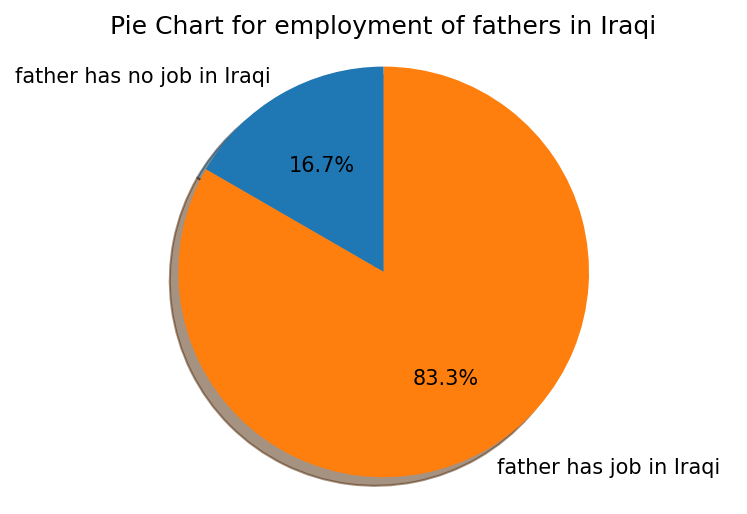

In [152]:
Bcount_tab = [fno, fha]

BName = ("father has no job in Iraqi", "father has job in Iraqi")
explode = (0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for employment of fathers in Iraqi')
plt.show()

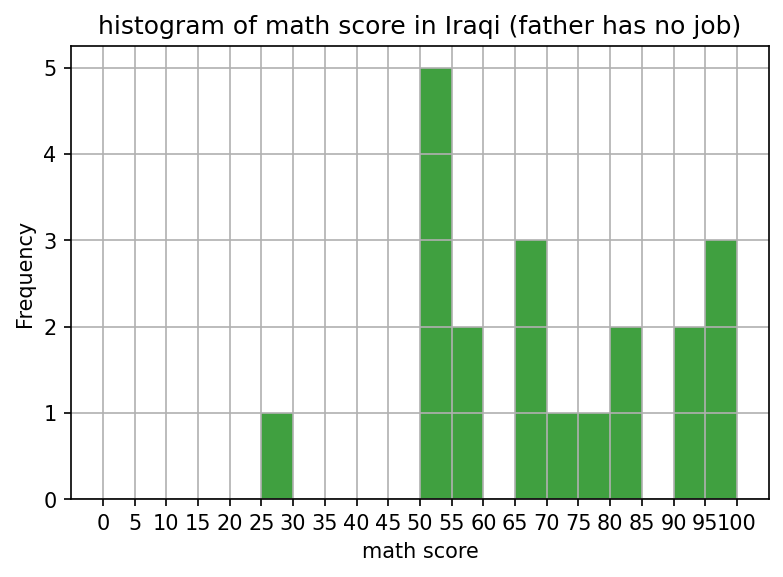

父親無工作之分數平均 = 68.75
父親無工作之分數標準差 = 20.695473697863196


In [99]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(fnojob, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(fnojob)
sigma = np.std(fnojob)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (father has no job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("父親無工作之分數平均 =", np.mean(fnojob))
print("父親無工作之分數標準差 =", np.std(fnojob, ddof = 1))

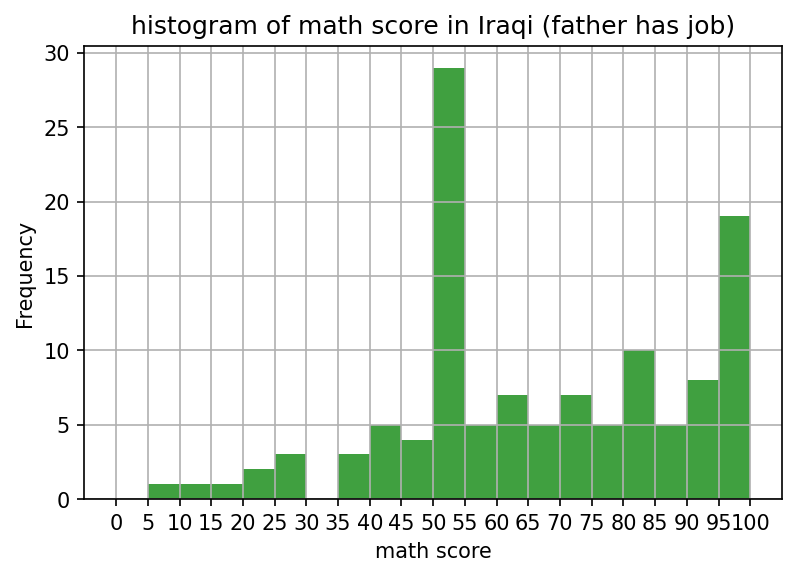

父親有工作之分數平均 = 64.82
父親有工作之分數標準差 = 23.853670068934377


In [144]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(mathIraqi, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(fhavejob)
sigma = np.std(fhavejob)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (father has job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("父親有工作之分數平均 =", np.mean(fhavejob))
print("父親有工作之分數標準差 =", np.std(fhavejob, ddof = 1))

#### Columbia

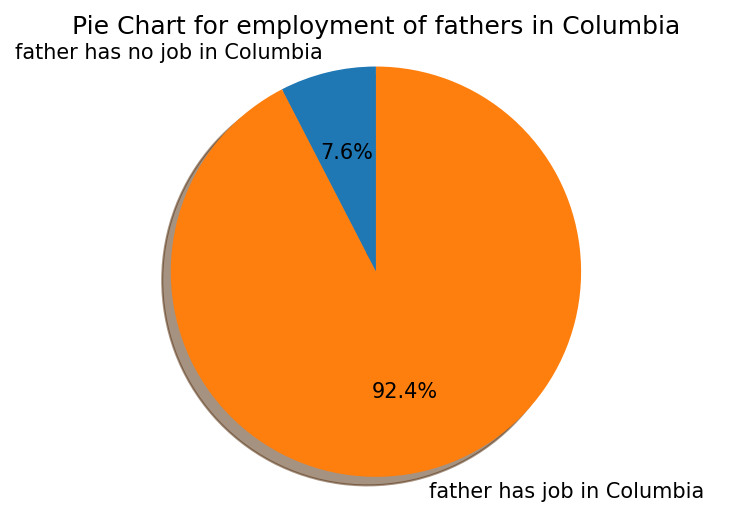

In [153]:
Bcount_tab = [fnoC, fhaC]

BName = ("father has no job in Columbia", "father has job in Columbia")
explode = (0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for employment of fathers in Columbia')
plt.show()

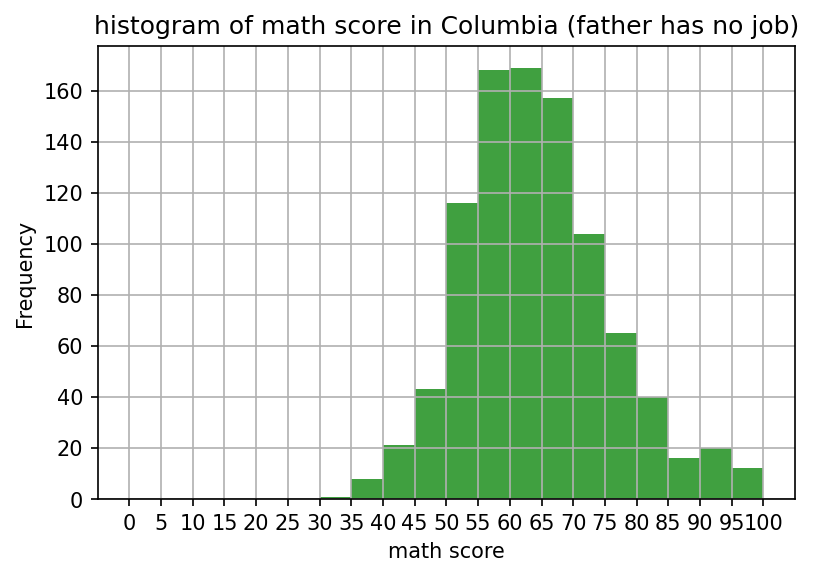

父親無工作之分數平均 = 63.80106382978723
父親無工作之分數標準差 = 11.661164027269955


In [145]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(fnojobC, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(fnojobC)
sigma = np.std(fnojobC)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Columbia (father has no job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("父親無工作之分數平均 =", np.mean(fnojobC))
print("父親無工作之分數標準差 =", np.std(fnojobC, ddof = 1))

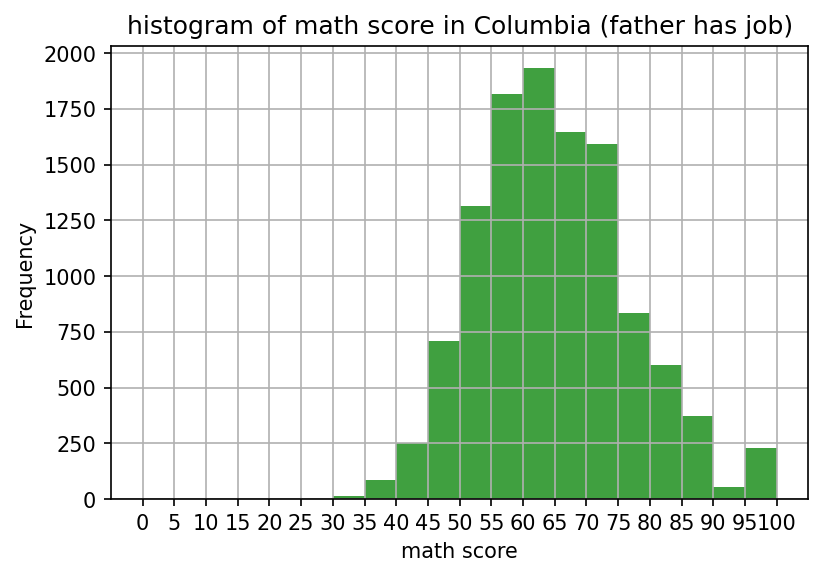

父親有工作之分數平均 = 64.36335105919275
父親有工作之分數標準差 = 11.89038702662813


In [107]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(fhavejobC, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(fhavejobC)
sigma = np.std(fhavejobC)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Columbia (father has job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("父親有工作之分數平均 =", np.mean(fhavejobC))
print("父親有工作之分數標準差 =", np.std(fhavejobC, ddof = 1))

**小結**  
就父親有無工作而言，雖然在哥倫比亞有較高的平均分數，但是在伊拉克的情況下卻並無這樣的傾向，可能是因樣本數不足形成的抽樣誤差。

### (e) Whether One's Mother is Employed

#### Null hypothesis: 母親有工作對數學成績有正面影響。

#### Iraq

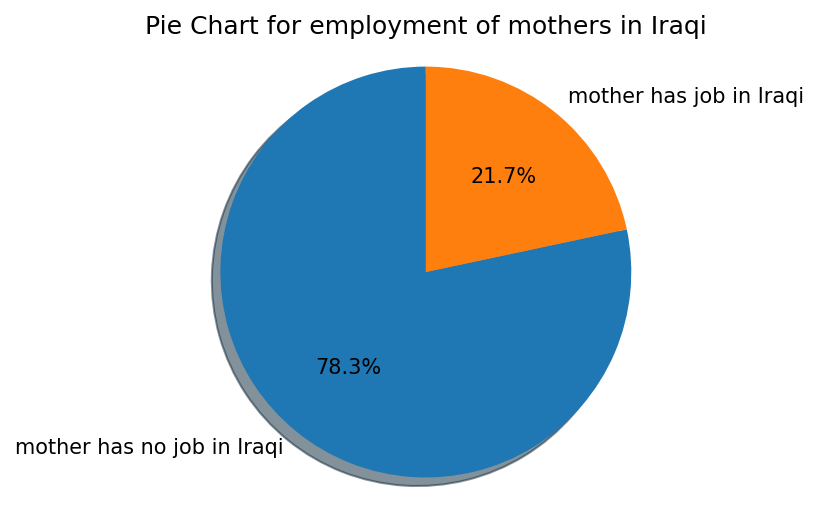

In [154]:
Bcount_tab = [mno, mha]

BName = ("mother has no job in Iraqi", "mother has job in Iraqi")
explode = (0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for employment of mothers in Iraqi')
plt.show()

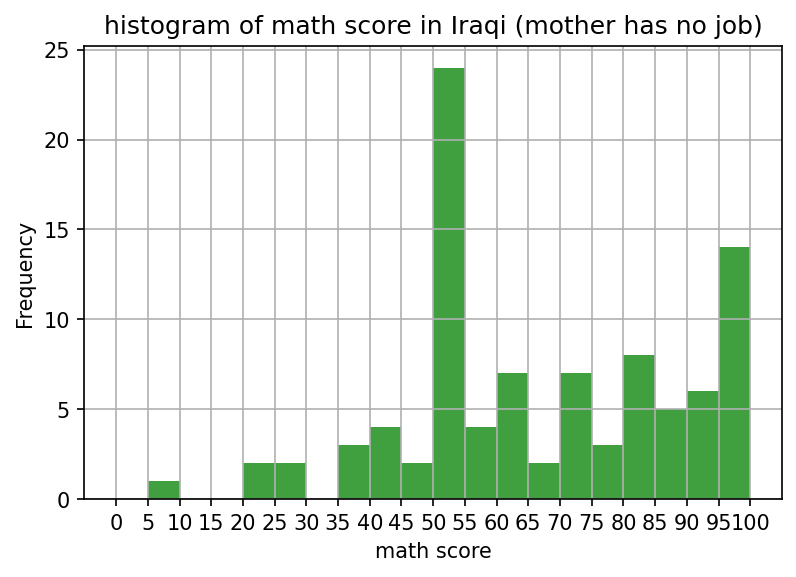

母親無工作之分數平均 = 65.68085106382979
母親無工作之分數標準差 = 22.53370844917017


In [159]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(mnojob, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(mnojob)
sigma = np.std(mnojob)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (mother has no job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("母親無工作之分數平均 =", np.mean(mnojob))
print("母親無工作之分數標準差 =", np.std(mnojob, ddof = 1))

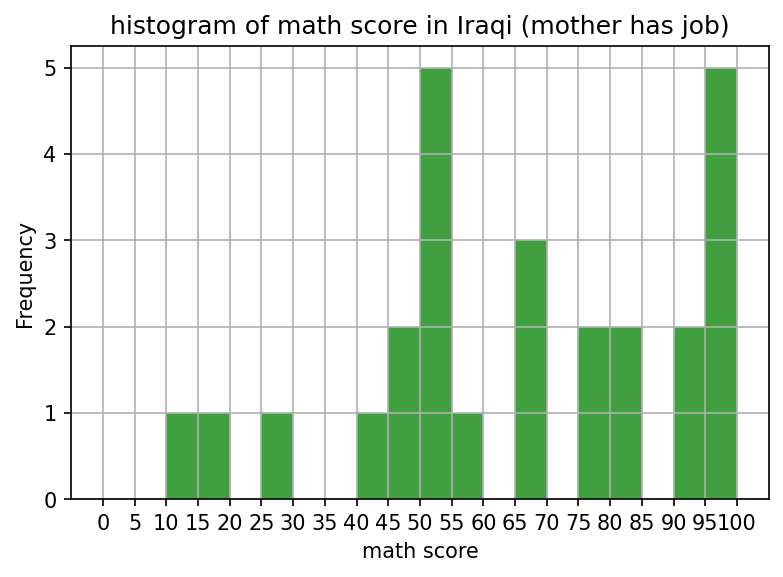

母親有工作之分數平均 = 64.73076923076923
母親有工作之分數標準差 = 26.446259005474015


In [155]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(mhavejob, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(mhavejob)
sigma = np.std(mhavejob)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Iraqi (mother has job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("母親有工作之分數平均 =", np.mean(mhavejob))
print("母親有工作之分數標準差 =", np.std(mhavejob, ddof = 1))

#### Columbia

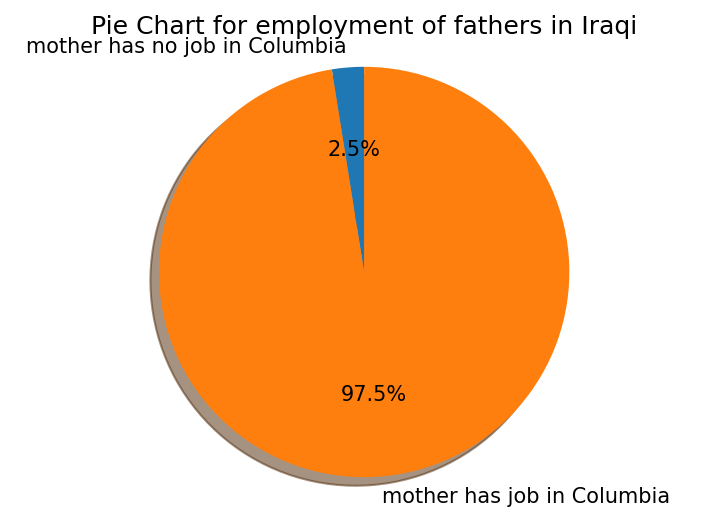

In [162]:
Bcount_tab = [mnoC, mhaC]

BName = ("mother has no job in Columbia", "mother has job in Columbia")
explode = (0, 0)  # only "explode" the 1st slice (i.e. 'Budweiser Light')
fig3, ax3 = plt.subplots()
ax3.pie(Bcount_tab, explode=explode, labels=BName, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for employment of fathers in Iraqi')
plt.show()

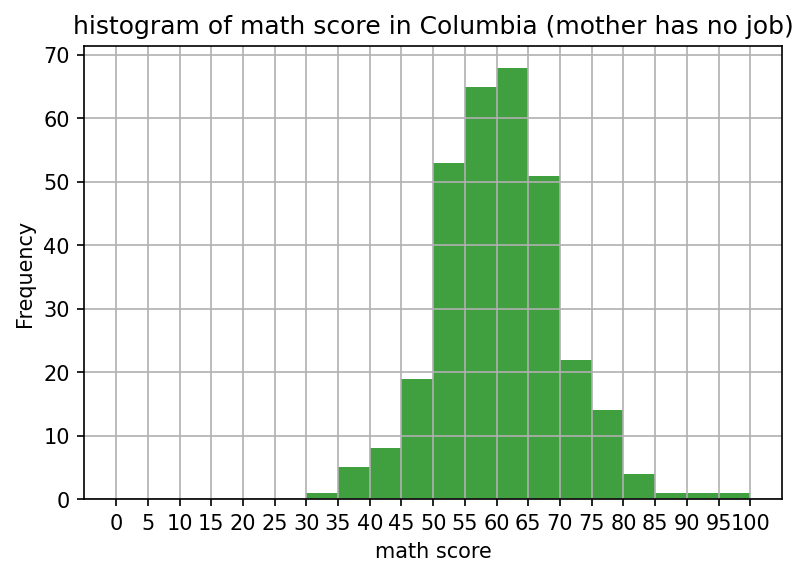

母親無工作之分數平均 = 60.054313099041536
母親無工作之分數標準差 = 9.579638642968737


In [156]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(mnojobC, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(mnojobC)
sigma = np.std(mnojobC)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Columbia (mother has no job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("母親無工作之分數平均 =", np.mean(mnojobC))
print("母親無工作之分數標準差 =", np.std(mnojobC, ddof = 1))

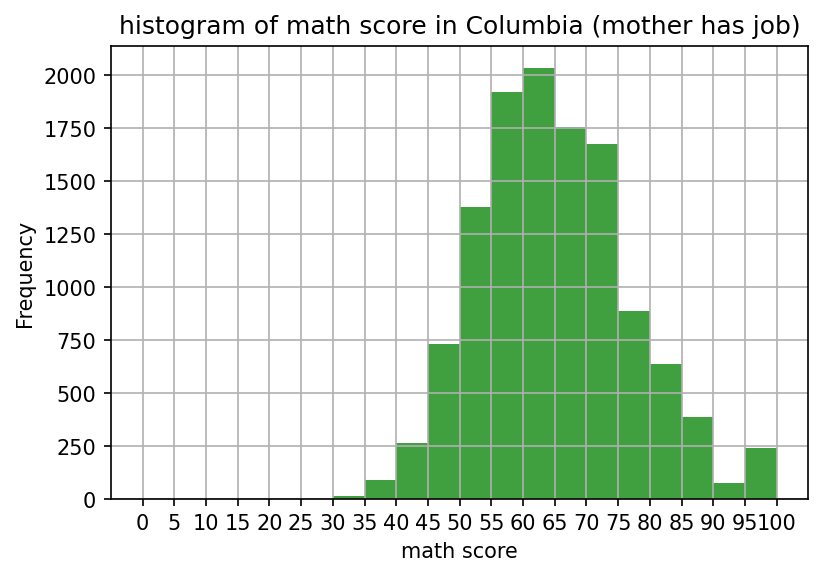

母親有工作之分數平均 = 64.43114564390808
母親有工作之分數標準差 = 11.907197935638077


In [157]:
arr = np.arange(0, 105, 5)
bins_list = arr
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(mhavejobC, bins=bins_list, density=False, facecolor='g', alpha=0.75)
mu = np.mean(mhavejobC)
sigma = np.std(mhavejobC)
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.title('histogram of math score in Columbia (mother has job)')
# plt.text(60, .025, r'$\mu = $', mu,'$\sigma = $', sigma)
plt.grid(True)
plt.xticks(bins_list)
#bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
#ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

print("母親有工作之分數平均 =", np.mean(mhavejobC))
print("母親有工作之分數標準差 =", np.std(mhavejobC, ddof = 1))

**小結**  
在哥倫比亞，母親有無工作確實影響了數學成績；但在伊拉克卻沒有這樣的傾向，這有可能與伊拉克的大多數婦女並無工作有關，因此母親有無工作並非重要原因。

### (f) Socioeconomic Status of Parents

#### Null hypothesis: 家境對數學成績無任何影響。

#### Iraq

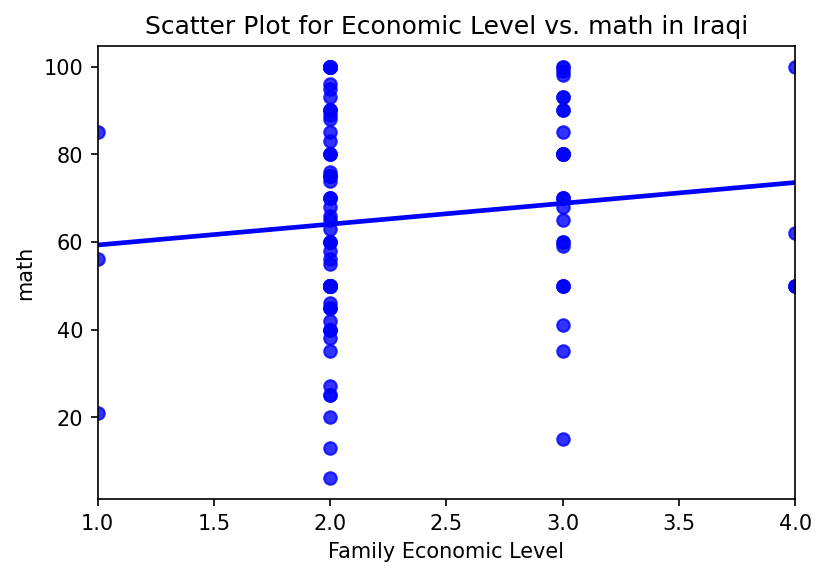

In [135]:
_ = sns.regplot(x='Family Economic Level', y= 'math', data = iraqi, color = 'b', ci = None)
plt.title('Scatter Plot for Economic Level vs. math in Iraqi')
plt.show()

In [140]:
print("Mean = ", mathIraqi.mean())
print("Median =", mathIraqi.median())
print("Mode =",   mathIraqi.mode(), '\n')

print("Std. Dev. =",   mathIraqi.std())
print("Max =",   mathIraqi.max())
print("Min =",   mathIraqi.min(), "\n")
#Compute the covariance matrix
cov_mat = np.cov(iraqi[['Family Economic Level', 'math']].values, 
                 rowvar = False)
print('The covariance matrix:\n', cov_mat, '\n')
#Compute the correlation matrix
cor_mat = np.corrcoef(iraqi[['Family Economic Level', 'math']].values, 
                 rowvar = False)
print('The correlation matrix:\n', cor_mat, '\n')

Mean =  65.475
Median = 62.5
Mode = 0    50
dtype: int64 

Std. Dev. = 23.32199254211469
Max = 100
Min = 6 

The covariance matrix:
 [[3.46218487e-01 1.64621849e+00]
 [1.64621849e+00 5.43915336e+02]] 

The correlation matrix:
 [[1.         0.11996283]
 [0.11996283 1.        ]] 



In [4]:
n=120
alpha = 0.05
df1 = 118    #df1=n-2
r =0.12
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9803
t = 1.3130


#### Columbia

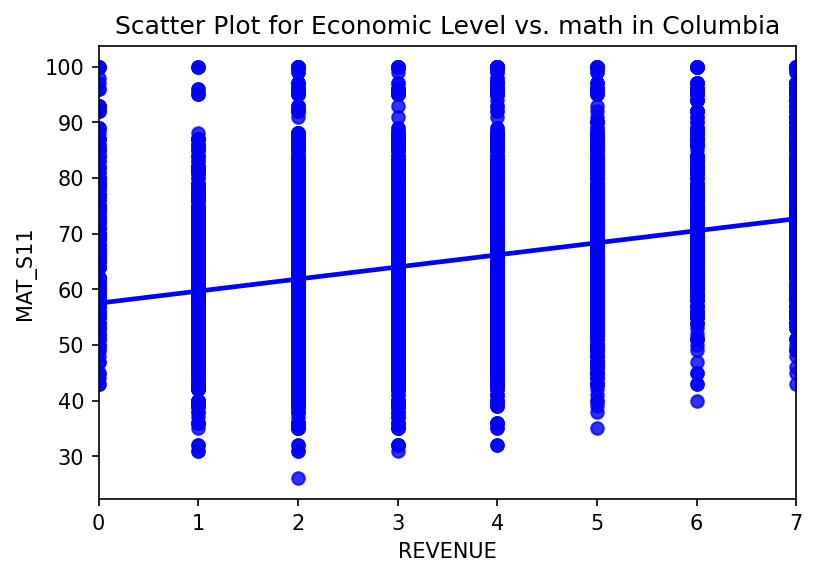

In [128]:
_ = sns.regplot(x='REVENUE', y= 'MAT_S11', data = columbia, color = 'b', ci = None)
plt.title('Scatter Plot for Economic Level vs. math in Columbia')
plt.show()

In [141]:
print("Mean = ", mathcolum.mean())
print("Median =", mathcolum.median())
print("Mode =",   mathcolum.mode(), '\n')

print("Std. Dev. =",   mathcolum.std())
print("Max =",   mathcolum.max())
print("Min =",   mathcolum.min(), "\n")
#Compute the covariance matrix
cov_mat = np.cov(columbia[['REVENUE', 'MAT_S11']].values, 
                 rowvar = False)
print('The covariance matrix:\n', cov_mat, '\n')
#Compute the correlation matrix
cor_mat = np.corrcoef(columbia[['REVENUE', 'MAT_S11']].values, 
                 rowvar = False)
print('The correlation matrix:\n', cor_mat, '\n')

Mean =  64.32076383853034
Median = 64.0
Mode = 0    64
dtype: int64 

Std. Dev. = 11.87365002007632
Max = 100
Min = 26 

The covariance matrix:
 [[  2.6165142    5.67426471]
 [  5.67426471 140.9835648 ]] 

The correlation matrix:
 [[1.         0.29543626]
 [0.29543626 1.        ]] 



In [3]:
n=12411
alpha = 0.05
df1 = 14209    #df1=n-2
r =0.2954
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9601
t = 34.4434


**小結**  
在哥倫比亞，因為t > tcv，拒絕二者不相關之假設，因此兩者確實有相關；但是在伊拉克的情況下，t < tcv，無法證明兩者有相關。

___
### 3. Personal Life
### (a) Internet Usage

#### Null hypothesis: 網路的使用與數學成績的相關係數為0。

In [5]:
por = pd.read_excel('student-mat.xlsx')
iraq = pd.read_excel('Iraqi Student Performance Prediction.xlsx')
col = pd.read_excel('data_academic_performance.xlsx')

In [6]:
por['ave'] = (por['G1'] + por['G2'] + por['G3'])/3
iraq['aveMath'] = (iraq['math'] + iraq['math.1'])/2

#### Iraq

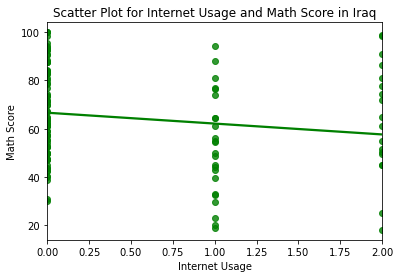

Mean =  56.095238095238095
Median = 50.0
Mode = 0    50
dtype: int64 

Std. Dev. = 25.263305621346102
Max = 100
Min = 6 

The covariance matrix:
 [[  0.55462185  -2.49789916]
 [ -2.49789916 429.51244748]] 

The correlation matrix:
 [[ 1.         -0.16184099]
 [-0.16184099  1.        ]] 



In [209]:
_ = sns.regplot(x='Internet Usage', y= 'aveMath', data = iraq, color = 'g', ci = None)
plt.title('Scatter Plot for Internet Usage and Math Score in Iraq')
plt.xlabel('Internet Usage')
plt.ylabel('Math Score')
plt.show()

print("Mean = ", iraqIntY['math'].mean())
print("Median =", iraqIntY['math'].median())
print("Mode =",   iraqIntY['math'].mode(), '\n')

print("Std. Dev. =",   iraqIntY['math'].std())
print("Max =",   iraqIntY['math'].max())
print("Min =",   iraqIntY['math'].min(), "\n")
#Compute the covariance matrix
cov_mat = np.cov(iraq[['Internet Usage', 'aveMath']].values, 
                 rowvar = False)
print('The covariance matrix:\n', cov_mat, '\n')
#Compute the correlation matrix
cor_mat = np.corrcoef(iraq[['Internet Usage', 'aveMath']].values, 
                 rowvar = False)
print('The correlation matrix:\n', cor_mat, '\n')

In [32]:
n=iraq.shape[0]
alpha = 0.05
df1 = n-2          #df1=n-2
r = 0.16
t = r*((n-2)/(1-r**2))**(1/2)
t1 = r*((n-2)/(1-r**2))

tcv = stats.t.ppf(1 - alpha/2, df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9803
t = 1.7607


t < tcv, 沒有足夠證據拒絕$H_0$。

#### Portugal

##### internet = yes

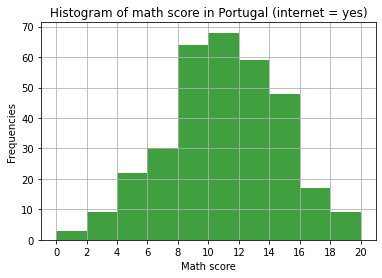

Mean =  10.849037487335366
Median = 11.0
Mode = 0    9.0
dtype: float64 

Std. Dev. = 3.7064325427628004
Max = 19.333333333333332
Min = 1.3333333333333333


In [7]:
porIntY = por[por['internet'] == 'yes']

arr = np.arange(0, 22, 2)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Portugal (internet = yes)')
counts, bins, patches = plt.hist(porIntY['ave'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", porIntY['ave'].mean())
print("Median =", porIntY['ave'].median())
print("Mode =",   porIntY['ave'].mode(), '\n')
print("Std. Dev. =",   porIntY['ave'].std())
print("Max =",   porIntY['ave'].max())
print("Min =",   porIntY['ave'].min())

##### internet = no

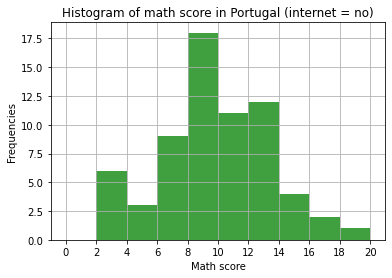

Mean =  9.833333333333332
Median = 9.333333333333334
Mode = 0    9.333333
dtype: float64 

Std. Dev. = 3.5557825782223733
Max = 18.0
Min = 2.3333333333333335


In [8]:
porIntN = por[por['internet'] == 'no']

arr = np.arange(0, 22, 2)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Portugal (internet = no)')
counts, bins, patches = plt.hist(porIntN['ave'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", porIntN['ave'].mean())
print("Median =", porIntN['ave'].median())
print("Mode =",   porIntN['ave'].mode(), '\n')
print("Std. Dev. =",   porIntN['ave'].std())
print("Max =",   porIntN['ave'].max())
print("Min =",   porIntN['ave'].min())

無網路使用量的狀況下，  
$H_0: \mu \geq 10.85$  
$H_1: \mu < 10.85$ (mu of Internet = No < mu of Internet = Yes)

In [11]:
m1 = porIntN['ave'].mean()
n = porIntN['ave'].shape[0]
h0mean = porIntY['ave'].mean()
h0sd = porIntY['ave'].std()
siglevel = 0.1


zstat = (m1-h0mean) / (h0sd/(n ** 0.5))
print('z = ', zstat, '\n')
p_onetail = stats.norm.cdf(zstat)
print(f"p-value (one-tail) = {p_onetail:.4f}")

z =  -2.226296974154556 

p-value (one-tail) = 0.0130


p-value = 0.01 < alpha = 0.1, reject $H_0$.  
因此，我們可以推論有使用網路的成績平均值大於無使用網路。

#### Columbia

##### internet = yes

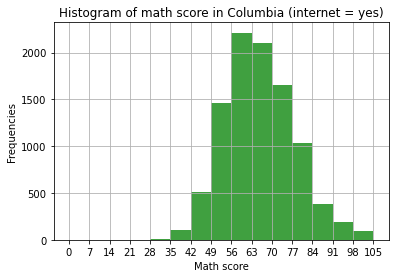

Mean =  65.2131870385562
Median = 64.0
Mode = 0    64
dtype: int64 

Std. Dev. = 11.921158393762287
Max = 100
Min = 31


In [235]:
colIntY = col[col['INTERNET'] == 'Yes']

arr = np.arange(0, 110, 7)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Columbia (internet = yes)')
counts, bins, patches = plt.hist(colIntY['MAT_S11'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", colIntY['MAT_S11'].mean())
print("Median =", colIntY['MAT_S11'].median())
print("Mode =",   colIntY['MAT_S11'].mode(), '\n')
print("Std. Dev. =",   colIntY['MAT_S11'].std())
print("Max =",   colIntY['MAT_S11'].max())
print("Min =",   colIntY['MAT_S11'].min())

##### internet = no

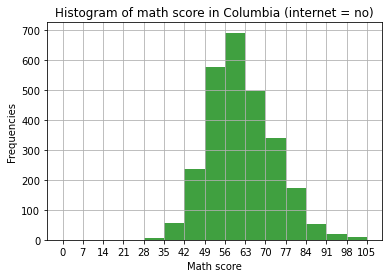

Mean =  61.047762316660396
Median = 60.0
Mode = 0    57
dtype: int64 

Std. Dev. = 11.101842900888402
Max = 100
Min = 26


In [237]:
colIntN = col[col['INTERNET'] == 'No']

arr = np.arange(0, 110, 7)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Columbia (internet = no)')
counts, bins, patches = plt.hist(colIntN['MAT_S11'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", colIntN['MAT_S11'].mean())
print("Median =", colIntN['MAT_S11'].median())
print("Mode =",   colIntN['MAT_S11'].mode(), '\n')
print("Std. Dev. =",   colIntN['MAT_S11'].std())
print("Max =",   colIntN['MAT_S11'].max())
print("Min =",   colIntN['MAT_S11'].min())

**小結**  
在伊拉克的資料集中，在家上網和課業表現呈現負相關，符合原本的假設；然而，在葡萄牙與哥倫比亞的資料集中，有使用網路的學生，其數學成績的平均值與中位數，皆比無網路使用量的學生高，推翻原本的假設。

### (b) Romance

#### Null Hypothesis: 有交往對象會降低數學成績。

#### Iraq

##### romantic = yes

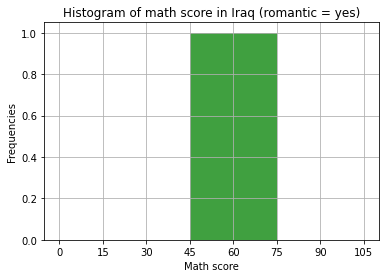

Mean =  54.5
Median = 54.5
Mode = 0    47.5
1    61.5
dtype: float64 

Std. Dev. = 9.899494936611665
Max = 61.5
Min = 47.5


In [247]:
iraqRomY = iraq[iraq['Social Status'] == 'coupled']

arr = np.arange(0, 110, 15)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Iraq (romantic = yes)')
counts, bins, patches = plt.hist(iraqRomY['aveMath'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", iraqRomY['aveMath'].mean())
print("Median =", iraqRomY['aveMath'].median())
print("Mode =",   iraqRomY['aveMath'].mode(), '\n')
print("Std. Dev. =",   iraqRomY['aveMath'].std())
print("Max =",   iraqRomY['aveMath'].max())
print("Min =",   iraqRomY['aveMath'].min())

##### romantic = no

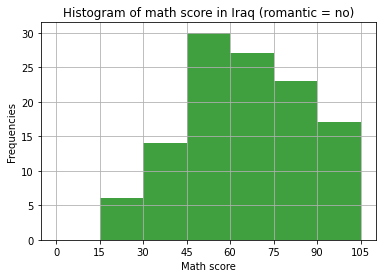

Mean =  64.61538461538461
Median = 63.5
Mode = 0    61.0
dtype: float64 

Std. Dev. = 20.90922340361247
Max = 100.0
Min = 18.0


In [249]:
iraqRomN = iraq[iraq['Social Status'] == 'single']

arr = np.arange(0, 110, 15)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Iraq (romantic = no)')
counts, bins, patches = plt.hist(iraqRomN['aveMath'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", iraqRomN['aveMath'].mean())
print("Median =", iraqRomN['aveMath'].median())
print("Mode =",   iraqRomN['aveMath'].mode(), '\n')
print("Std. Dev. =",   iraqRomN['aveMath'].std())
print("Max =",   iraqRomN['aveMath'].max())
print("Min =",   iraqRomN['aveMath'].min())

#### Portugal

##### romantic = yes

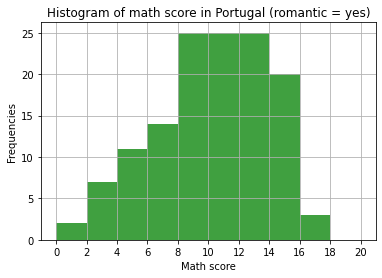

Mean =  10.1439393939394
Median = 10.5
Mode = 0    11.333333
dtype: float64 

Std. Dev. = 3.6944800265204085
Max = 17.666666666666668
Min = 1.3333333333333333


In [243]:
porRomY = por[por['romantic'] == 'yes']

arr = np.arange(0, 22, 2)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Portugal (romantic = yes)')
counts, bins, patches = plt.hist(porRomY['ave'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", porRomY['ave'].mean())
print("Median =", porRomY['ave'].median())
print("Mode =",   porRomY['ave'].mode(), '\n')
print("Std. Dev. =",   porRomY['ave'].std())
print("Max =",   porRomY['ave'].max())
print("Min =",   porRomY['ave'].min())

##### romantic = no

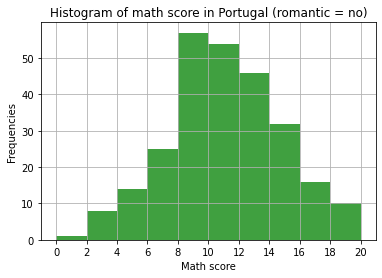

Mean =  10.948035487959439
Median = 10.666666666666666
Mode = 0    9.0
dtype: float64 

Std. Dev. = 3.67559682626783
Max = 19.333333333333332
Min = 1.6666666666666667


In [244]:
porRomN = por[por['romantic'] == 'no']

arr = np.arange(0, 22, 2)
bins_list = arr
fig, ax = plt.subplots()
plt.xlabel('Math score')
plt.ylabel('Frequencies')
plt.title('Histogram of math score in Portugal (romantic = no)')
counts, bins, patches = plt.hist(porRomN['ave'], bins=bins_list, density=False, facecolor='g', alpha=0.75)
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]

plt.show()
print("Mean = ", porRomN['ave'].mean())
print("Median =", porRomN['ave'].median())
print("Mode =",   porRomN['ave'].mode(), '\n')
print("Std. Dev. =",   porRomN['ave'].std())
print("Max =",   porRomN['ave'].max())
print("Min =",   porRomN['ave'].min())

**小結**  
由於伊拉克的資料集有交往對象的只有兩個，因此可能會有抽樣誤差，難以做為參考；而葡萄牙的資料集則是看不出交往對象對學習成績的影響(平均值、中位數、變異數的差都小於1)

For the following attributes, only the **Portuguese** dataset is considered.

### (c) Absence

#### Null Hypothesis: 出席率跟數學成績無關。

In [13]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
df_c3_3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


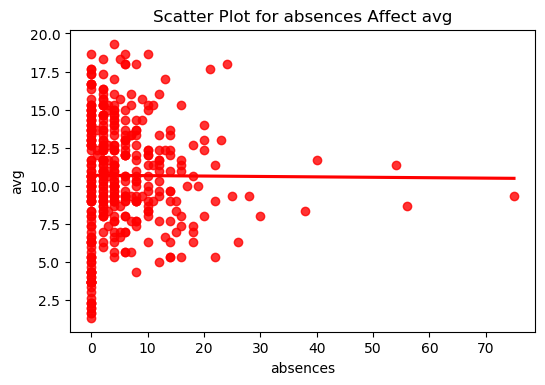

covariance matrix
[[13.66622402 -0.17481634]
 [-0.17481634 64.04954058]]
coefficient of corelation matrix
[[ 1.         -0.00590881]
 [-0.00590881  1.        ]]


In [34]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='absences', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('absences')
plt.ylabel('avg')
plt.title('Scatter Plot for absences Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'absences']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'absences']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [27]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = -0.00590881
t = r*((n-2)/(1-r**2))**(1/2)

tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = -0.1171


coefficient of correlation: -0.00590881  
covariance: -0.17481634  
standard deviation: 8.003096  
mean: 3.696786

**小結**  
出席率跟數學成績相關性非常低，而且迴歸直線非常非常接近於直線，$t$值也不足以拒絕$H_0$，所以我們可以下如此結論：出席率跟成績無關。

### (d) Health

#### Null Hypothesis: 健康程度和數學成績無關。

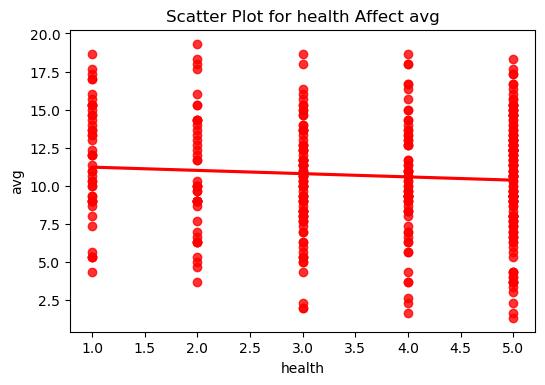

covariance matrix
[[13.66622402 -0.41312729]
 [-0.41312729  1.93294352]]
coefficient of corelation matrix
[[ 1.         -0.08038038]
 [-0.08038038  1.        ]]


In [35]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='health', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('health')
plt.ylabel('avg')
plt.title('Scatter Plot for health Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'health']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'health']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [28]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = -0.08038038
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = -1.5987


coefficient of correlation: -0.08038038  
covariance: -0.41312729  
standard deviation: 1.390303  
mean: 3.696786

**小結**  
我們可以發現健康程度和數學成績有些微的相關性，而且迴歸直線有一點點斜率，但$t$值不足以拒絕$H_0$，所以我們可以下如此結論：這些同學中越健康成績越差。

### (e) Weekend Alcohol Consumption

#### Null Hypothesis: 假日飲酒跟數學成績無關。

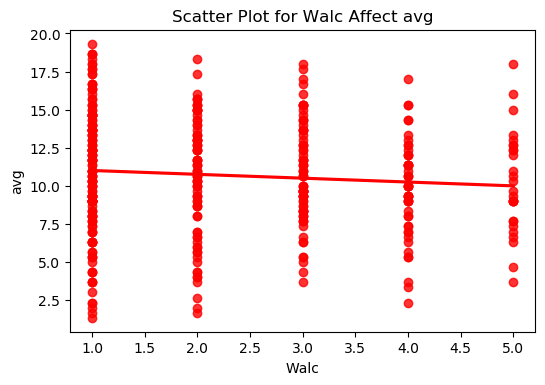

covariance matrix
[[13.66622402 -0.41909229]
 [-0.41909229  1.65867763]]
coefficient of corelation matrix
[[ 1.         -0.08802467]
 [-0.08802467  1.        ]]


In [36]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='Walc', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('Walc')
plt.ylabel('avg')
plt.title('Scatter Plot for Walc Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'Walc']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'Walc']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [29]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = -0.08802467
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = -1.7518


coefficient of correlation: -0.08802467  
covariance: -0.41909229  
standard deviation: 1.287897  
mean: 3.696786

**小結**  
我們可以發現假日飲酒跟數學成績有些微的相關性，而且迴歸直線有一點點斜率，但$t$值不足以拒絕$H_0$，所以我們可以下如此結論：這些同學中假日飲酒越多成績越差。

### (f) Workday Alcohol Consumption

#### Null Hypothesis: 平日飲酒跟數學成績無關。

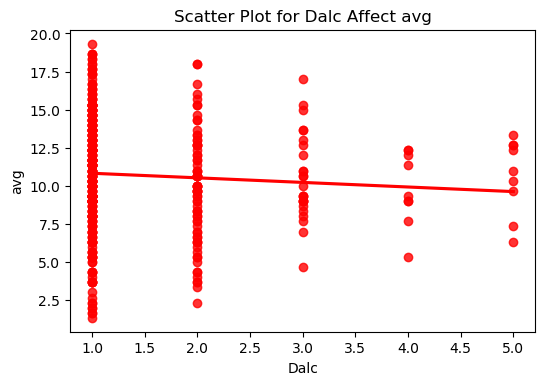

covariance matrix
[[13.66622402 -0.23876074]
 [-0.23876074  0.79342029]]
coefficient of corelation matrix
[[ 1.         -0.07250818]
 [-0.07250818  1.        ]]


In [37]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='Dalc', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('Dalc')
plt.ylabel('avg')
plt.title('Scatter Plot for Dalc Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'Dalc']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'Dalc']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [30]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = -0.07250818
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = -1.4412


coefficient of correlation: -0.07250818  
covariance: -0.23876074  
standard deviation: 0.890741  
mean: 3.696786

**小結**  
我們可以發現平日飲酒跟數學成績有些微的相關性，而且迴歸直線有一點點斜率，但$t$值不足以拒絕$H_0$，所以我們可以下如此結論：這些同學中平日飲酒越多成績越差。  
另外，我們可以發現一個有趣的結論，假日飲酒的相關性比平日飲酒的相關性高。

### (g) Frequency of Going Out with Friends

#### Null Hypothesis: 和朋友出遊的頻率跟數學成績無關。

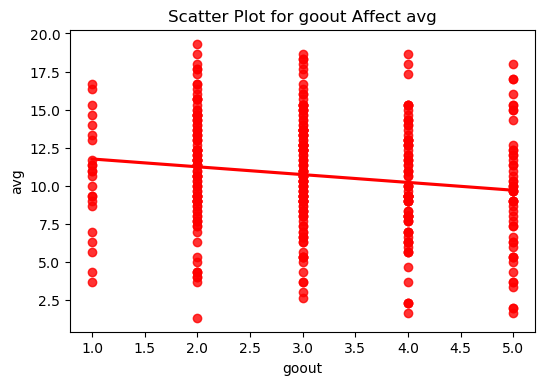

covariance matrix
[[13.66622402 -0.63589925]
 [-0.63589925  1.23938829]]
coefficient of corelation matrix
[[ 1.         -0.15451134]
 [-0.15451134  1.        ]]


In [38]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='goout', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('goout')
plt.ylabel('avg')
plt.title('Scatter Plot for goout Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'goout']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'goout']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [31]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = -0.15451134
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = -3.1003


coefficient of correlation: -0.15451134  
covariance: -0.63589925  
standard deviation: 1.113278  
mean: 3.696786

**小結**  
我們可以發現和朋友出遊的頻率跟數學成績呈負相關，且$t$值足以拒絕$H_0$，所以我們可以下如此結論：這些同學中越常跟同學出去玩者成績越差，且兩者有微弱的相關性。

### (h) Free Time After School

#### Null Hypothesis: 課餘時間多寡和成績無關。

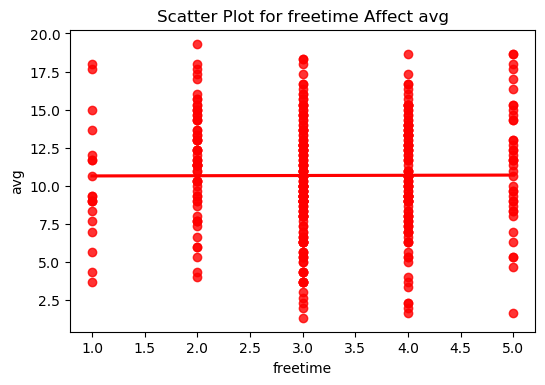

covariance matrix
[[13.66622402  0.01393262]
 [ 0.01393262  0.99772537]]
coefficient of corelation matrix
[[1.         0.00377314]
 [0.00377314 1.        ]]


In [39]:
df_c3_3 = pd.read_excel('統計專案-2.xlsx','葡萄牙')
_ = sns.regplot(x='freetime', y= 'avg', data = df_c3_3, color = 'r', ci = None)
plt.xlabel('freetime')
plt.ylabel('avg')
plt.title('Scatter Plot for freetime Affect avg')
plt.show()
cov_mat = np.cov(df_c3_3[['avg', 'freetime']].values, 
                 rowvar = False)
print('covariance matrix')
print(cov_mat)
#Compute the correlation matrix
cor_mat = np.corrcoef(df_c3_3[['avg', 'freetime']].values, 
                 rowvar = False)
print('coefficient of corelation matrix')
print(cor_mat)

In [32]:
n=395
alpha = 0.05
df1 =395-2           #df1=n-2
r = 0.00377314
t = r*((n-2)/(1-r**2))**(1/2)


tcv = stats.t.ppf(1 - alpha/2, 
                  df = df1)
print(f"tcv = {tcv:.4f}")
print(f"t = {t:.4f}")
#if t>tcv則拒絕H0
#H0=coefficient of corelation=0

tcv = 1.9660
t = 0.0748


coefficient of correlation: 0.00377314  
covariance: 0.01393262  
standard deviation: 0.998862  
mean: 3.696786

**小結**  
我們可以發現課餘時間多寡和成績相關性極低，而且回歸直線幾乎就是直線，$t$值完全不足以拒絕$H_0$，所以我們可以下如此結論：這些同學中課餘時間和成績無關。

___
## D. Summary

Most of the attributes showed moderate or weak correlation to the students' performance in math. It may be caused by a small sample size, data that does not accurately show the reality (e.g. applying regression on survey results that are ordinal data), or other errors. Nevertheless, we discovered some interesting facts and had the opportunity to present it to the class.  
The topic is surely worth further investigation, and we hope that after taking advanced courses, we are able to figure out how each attribute affects students' performance in math and perform a more detailed analysis.